In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [21]:
df = pd.read_csv('/work/kyrgyzstan_earthquake_data.csv')

### General info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       1528 non-null   object 
 1   latitude   1528 non-null   float64
 2   longitude  1528 non-null   float64
 3   depth      1225 non-null   float64
 4   magnitude  1367 non-null   float64
 5   place      1528 non-null   object 
dtypes: float64(4), object(2)
memory usage: 71.8+ KB


In [4]:
df.head()

,time,latitude,longitude,depth,magnitude,place
0,2024-05-22 19:03:34.828,38.1627,72.9757,129.743,4.3,"86 km W of Murghob, Tajikistan"
1,2024-05-20 18:31:33.788,41.5898,78.9162,10.000,4.3,"106 km SSE of Ak-Suu, Kyrgyzstan"
2,2024-05-20 05:10:23.245,40.1777,76.9563,27.994,5.1,"114 km NE of Kashgar, China"
3,2024-05-15 19:03:31.779,38.9173,70.8947,10.000,4.5,"46 km ESE of Rasht, Tajikistan"
4,2024-05-11 16:27:37.916,37.3323,71.9400,200.670,4.1,"38 km ESE of Khorugh, Tajikistan"


### Data Preprocessing

In [5]:
# number of null values in each column
df.isnull().sum()

time           0
latitude       0
longitude      0
depth        303
magnitude    161
place          0
dtype: int64

In [6]:
# filling missing values
df['depth'].fillna(df['depth'].mean(), inplace = True)
df['magnitude'].fillna(df['magnitude'].mean(), inplace = True)
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 time         0
latitude     0
longitude    0
depth        0
magnitude    0
place        0
dtype: int64


In [7]:
def remove_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'depth')
df = remove_outliers_iqr(df, 'magnitude')

numeric_columns = ['latitude', 'longitude', 'depth', 'magnitude']
for col in numeric_columns:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std

print(df.head())    

                      time  latitude  longitude     depth  magnitude  \
1  2024-05-20 18:31:33.788  1.492071   1.567424 -0.785817  -0.404176   
3  2024-05-15 19:03:31.779 -0.447820  -1.276826 -0.785817   0.665724   
5  2024-05-10 01:52:20.556 -1.673818   0.079542 -0.785817   0.665724   
6  2024-05-06 04:12:58.429  2.394547   1.631496 -0.557581  -0.404176   
7  2024-05-01 19:17:24.331  1.004721   1.357975 -0.785817   0.665724   

                              place  
1  106 km SSE of Ak-Suu, Kyrgyzstan  
3    46 km ESE of Rasht, Tajikistan  
5    100 km N of Barishal, Pakistan  
6    23 km SSW of Kegen, Kazakhstan  
7       132 km NNW of Tumxuk, China  


### Data Analysis

In [8]:
# Summary statistics 
df.describe()

,latitude,longitude,depth,magnitude
count,1.128000e+03,1.128000e+03,1.128000e+03,1.128000e+03
mean,-1.461400e-15,1.662972e-15,-3.149569e-17,1.045657e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.008154e+00,-1.984884e+00,-1.119355e+00,-2.009025e+00
25%,-7.402741e-01,-7.394184e-01,-7.858172e-01,-4.041757e-01
50%,-7.432326e-02,-3.219467e-01,-7.084325e-01,1.307740e-01
75%,9.754685e-01,1.118173e+00,8.505910e-01,6.657236e-01
max,3.137767e+00,2.174923e+00,3.303440e+00,2.270573e+00


In [9]:
# places where earthquakes happened
df['place'].apply(lambda x: (x.split(',')[-1])).unique()

array([' Kyrgyzstan', ' Tajikistan', ' Pakistan', ' Kazakhstan', ' China',
       ' Afghanistan', ' Uzbekistan', 'Tajikistan',
       'Afghanistan-Tajikistan border region',
       'Tajikistan-Xinjiang border region',
       'Uzbekistan-Kyrgyzstan border region', 'Kyrgyzstan',
       'Kazakhstan-Xinjiang border region',
       'Kazakhstan-Uzbekistan border region',
       'Kyrgyzstan-Tajikistan border region',
       'Kyrgyzstan-Tajikistan-Xinjiang border region',
       'northwestern Kashmir', 'Kyrgyzstan-Xinjiang border region'],
      dtype=object)

In [10]:
# magnitude distribution
df['magnitude'].round().value_counts()

magnitude
-0.0    499
 1.0    267
-1.0    231
 2.0     81
-2.0     50
Name: count, dtype: int64

In [11]:
# depth range
print(f"Depth min: {df['depth'].min()}")
print(f"Depth max: {df['depth'].max()}")
print(f"Depth range: {df['depth'].max() - df['depth'].min()}")


Depth min: -1.1193550010592437
Depth max: 3.3034400377232975
Depth range: 4.422795038782541


In [12]:
# Count of earthquakes per country
df['country'] = df['place'].apply(lambda x: x.split(',')[-1].strip())  
print(df['country'].value_counts())

country
Tajikistan                                      410
China                                           322
Kyrgyzstan                                      294
Afghanistan                                      26
Uzbekistan                                       22
Kazakhstan                                       16
Pakistan                                         14
Afghanistan-Tajikistan border region              6
Tajikistan-Xinjiang border region                 5
Uzbekistan-Kyrgyzstan border region               3
Kyrgyzstan-Tajikistan border region               3
Kyrgyzstan-Tajikistan-Xinjiang border region      2
Kyrgyzstan-Xinjiang border region                 2
Kazakhstan-Xinjiang border region                 1
Kazakhstan-Uzbekistan border region               1
northwestern Kashmir                              1
Name: count, dtype: int64


In [13]:
# Check if deeper earthquakes are stronger
correlation = df[['depth', 'magnitude']].corr()  
print(correlation)

              depth  magnitude
depth      1.000000  -0.090954
magnitude -0.090954   1.000000


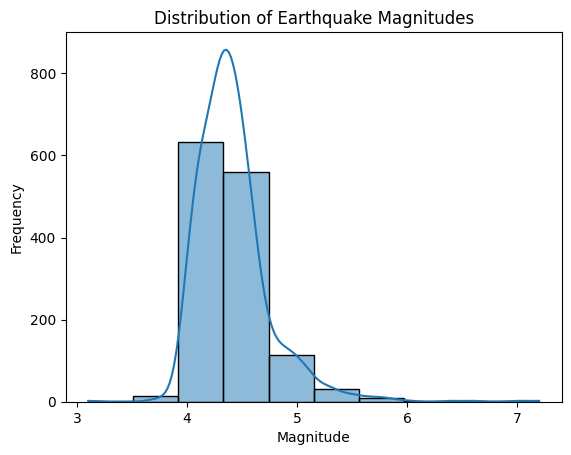

In [23]:
# Distribution of earthquake magnitudes
sns.histplot(df['magnitude'], bins=10, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_111/2666385467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['month'], palette='coolwarm')


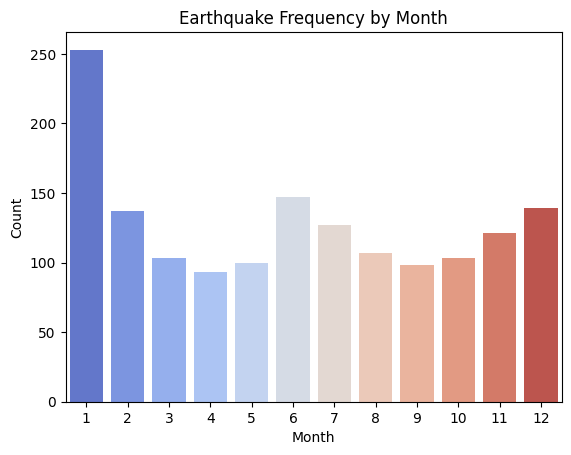

In [25]:
# Monthly earthquake occurrence
df['time'] = pd.to_datetime(df['time'])  
df['month'] = df['time'].dt.month  

sns.countplot(x=df['month'], palette='coolwarm')  
plt.title('Earthquake Frequency by Month')  
plt.xlabel('Month')  
plt.ylabel('Count')  
plt.show()


### Data Visualization

In [29]:
df.head()

,time,latitude,longitude,depth,magnitude,place,month
0,2024-05-22 19:03:34.828,38.1627,72.9757,129.743,4.3,"86 km W of Murghob, Tajikistan",5
1,2024-05-20 18:31:33.788,41.5898,78.9162,10.000,4.3,"106 km SSE of Ak-Suu, Kyrgyzstan",5
2,2024-05-20 05:10:23.245,40.1777,76.9563,27.994,5.1,"114 km NE of Kashgar, China",5
3,2024-05-15 19:03:31.779,38.9173,70.8947,10.000,4.5,"46 km ESE of Rasht, Tajikistan",5
4,2024-05-11 16:27:37.916,37.3323,71.9400,200.670,4.1,"38 km ESE of Khorugh, Tajikistan",5


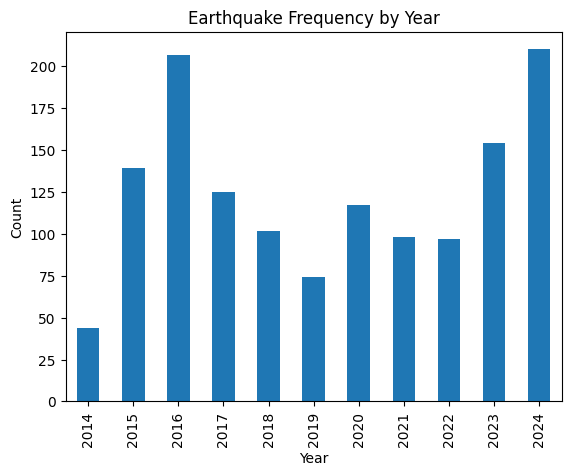

In [35]:
# Earthquake frequency by year
df['year'] = pd.to_datetime(df['time']).dt.year
df.groupby('year')['magnitude'].count().plot(kind='bar')
plt.title('Earthquake Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

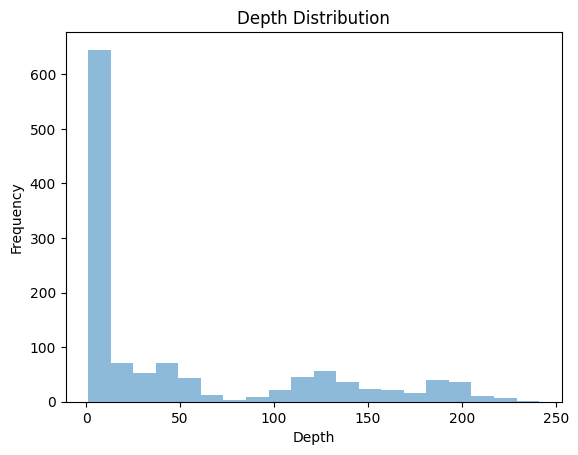

In [37]:
# Depth distribution
df['depth'].plot(kind='hist', bins=20, alpha=0.5)
plt.title('Depth Distribution')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()

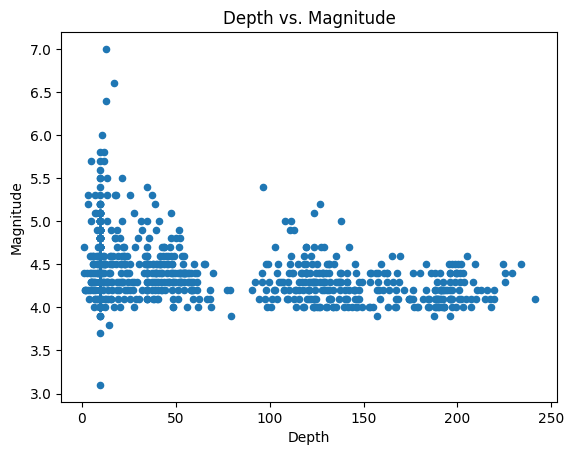

In [39]:
# Depth vs. Magnitude
df.plot(kind='scatter', x='depth', y='magnitude')
plt.title('Depth vs. Magnitude')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()

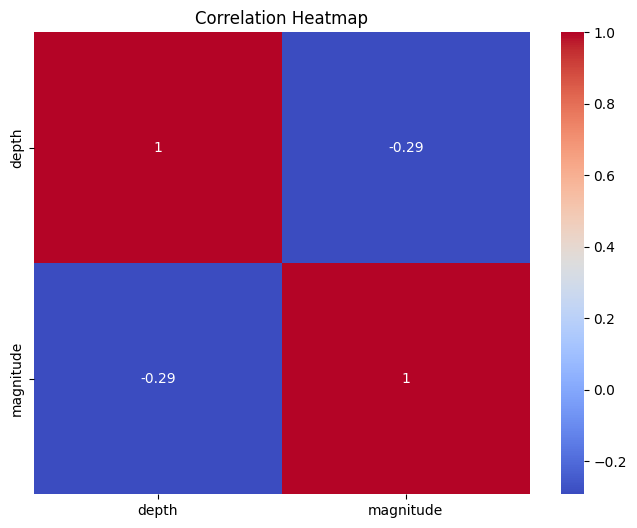

In [45]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['depth', 'magnitude']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

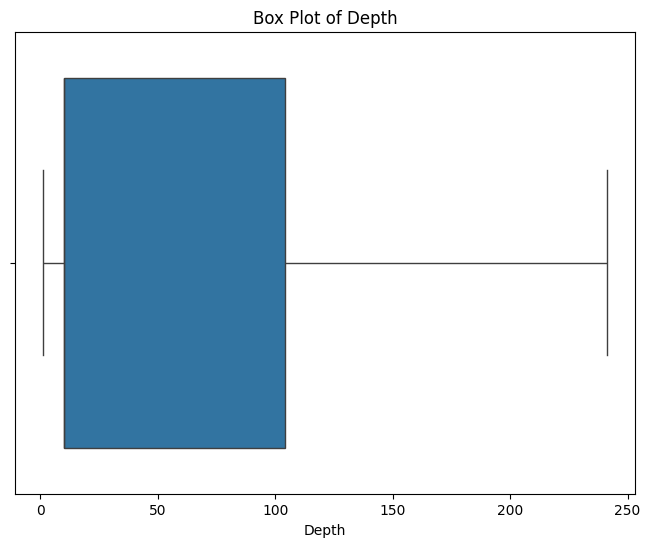

In [61]:
# box plot distribution of depth 
plt.figure(figsize=(8, 6))
sns.boxplot(x='depth', data=df)
plt.title('Box Plot of Depth')
plt.xlabel('Depth')
plt.show()